# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [ ]:
standard

In [ ]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station = pd.read_csv("df_seoul_bus_station.csv", sep = ",", encoding = "UTF-8")
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,1048,948,128.767927,121.371512
1,강동구,369,21,789,816,99.161194,97.118065
2,강북구,413,67,1187,1079,133.020373,128.791504
3,강서구,566,49,867,802,88.119480,87.587591
4,관악구,466,86,1507,1553,154.753674,157.516040


In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_moving = pd.read_csv("df_seoul_moving.csv", sep = ",", encoding = "UTF-8")
df_seoul_moving.head()

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
0,11010,9356120,19385709.60,21.349599,44.235978
1,11020,9306020,19715322.61,21.012462,44.516072
2,11030,8514380,14707082.87,21.364786,36.903883
3,11040,8887140,17449273.95,21.740324,42.685596
4,11050,8625540,17947278.99,22.474283,46.762548


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business = pd.read_csv("df.seoul_business.csv", sep = ",", encoding = "UTF-8", thousands = ",")
df_seoul_business.head()

,자치구,한식 일반 음식점업.1,커피전문점.1,기타주점업.1,한식 육류요리 전문점.1
0,종로구,5912,3613,1413,1982
1,중구,6414,3542,982,2121
2,용산구,2987,2076,1332,1184
3,성동구,2785,1859,621,1545
4,광진구,2861,1887,1577,1678


In [5]:
df_seoul_people = pd.read_csv("df_seoul_people.csv", sep = ",", encoding = "UTF-8")
df_seoul_people.head()

,자치구,고령자
0,종로구,28064
1,중구,24742
2,용산구,39461
3,성동구,46896
4,광진구,52604


In [8]:
df = pd.merge(standard, df_seoul_bus_station)
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,11010,종로구,349,106,924,815,131.889620,125.534028
1,11020,중구,178,103,922,872,121.020124,115.324511
2,11030,용산구,323,67,973,911,137.891694,134.485421
3,11040,성동구,435,58,729,668,96.377369,94.298888
4,11050,광진구,269,41,805,747,118.352546,118.523137


In [9]:
df = pd.merge(df, df_seoul_moving)
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
0,11010,종로구,349,106,924,815,131.889620,125.534028,9356120,19385709.60,21.349599,44.235978
1,11020,중구,178,103,922,872,121.020124,115.324511,9306020,19715322.61,21.012462,44.516072
2,11030,용산구,323,67,973,911,137.891694,134.485421,8514380,14707082.87,21.364786,36.903883
3,11040,성동구,435,58,729,668,96.377369,94.298888,8887140,17449273.95,21.740324,42.685596
4,11050,광진구,269,41,805,747,118.352546,118.523137,8625540,17947278.99,22.474283,46.762548


In [10]:
df = pd.merge(df, df_seoul_business)
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,한식 육류요리 전문점.1
0,11010,종로구,349,106,924,815,131.889620,125.534028,9356120,19385709.60,21.349599,44.235978,5912,3613,1413,1982
1,11020,중구,178,103,922,872,121.020124,115.324511,9306020,19715322.61,21.012462,44.516072,6414,3542,982,2121
2,11030,용산구,323,67,973,911,137.891694,134.485421,8514380,14707082.87,21.364786,36.903883,2987,2076,1332,1184
3,11040,성동구,435,58,729,668,96.377369,94.298888,8887140,17449273.95,21.740324,42.685596,2785,1859,621,1545
4,11050,광진구,269,41,805,747,118.352546,118.523137,8625540,17947278.99,22.474283,46.762548,2861,1887,1577,1678


In [11]:
pd.set_option("display.max_columns", None)

In [12]:
df = pd.merge(df, df_seoul_people)
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,한식 육류요리 전문점.1,고령자
0,11010,종로구,349,106,924,815,131.889620,125.534028,9356120,19385709.60,21.349599,44.235978,5912,3613,1413,1982,28064
1,11020,중구,178,103,922,872,121.020124,115.324511,9306020,19715322.61,21.012462,44.516072,6414,3542,982,2121,24742
2,11030,용산구,323,67,973,911,137.891694,134.485421,8514380,14707082.87,21.364786,36.903883,2987,2076,1332,1184,39461
3,11040,성동구,435,58,729,668,96.377369,94.298888,8887140,17449273.95,21.740324,42.685596,2785,1859,621,1545,46896
4,11050,광진구,269,41,805,747,118.352546,118.523137,8625540,17947278.99,22.474283,46.762548,2861,1887,1577,1678,52604
5,11060,동대문구,306,73,983,890,131.841430,128.692017,8838130,16288077.28,21.673451,39.942708,3566,1472,1082,1509,62963
6,11070,중랑구,380,48,778,708,87.403863,86.214261,7939300,13907465.59,23.412789,41.012753,2479,1037,1000,1504,72851
7,11080,성북구,602,99,1082,977,123.251922,123.149430,9072420,18757182.35,22.160283,45.816273,2822,1384,1030,1334,75719
8,11090,강북구,413,67,1187,1079,133.020373,128.791504,7649610,12570412.30,23.811274,39.128470,2663,1095,1275,1176,64961
9,11100,도봉구,359,46,951,861,106.859356,103.855540,6995880,10821566.75,24.489976,37.882283,2009,837,477,943,65122


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   도착 시군구 코드      25 non-null     int64  
 1   자치구            25 non-null     object 
 2   정류장수           25 non-null     int64  
 3   노선수            25 non-null     int64  
 4   승차총승객수         25 non-null     int64  
 5   하차총승객수         25 non-null     int64  
 6   승차평균승객수        25 non-null     float64
 7   하차평균승객수        25 non-null     float64
 8   총 이동 시간        25 non-null     int64  
 9   총 이동 인구        25 non-null     float64
 10  평균 이동 시간(분)    25 non-null     float64
 11  이동인구(합)        25 non-null     float64
 12  한식 일반 음식점업.1   25 non-null     int64  
 13  커피전문점.1        25 non-null     int64  
 14  기타주점업.1        25 non-null     int64  
 15  한식 육류요리 전문점.1  25 non-null     int64  
 16  고령자            25 non-null     int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 3.5+ K

In [14]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합),한식 일반 음식점업.1,커피전문점.1,기타주점업.1,한식 육류요리 전문점.1,고령자
도착 시군구 코드,1.000000,0.447511,-0.069435,0.332353,0.412018,0.017980,0.029956,0.235541,0.473119,0.533514,0.610548,0.308156,0.267956,0.318339,0.342618,0.589508
정류장수,0.447511,1.000000,0.258798,0.410709,0.347409,-0.135318,-0.099146,0.356947,0.355635,0.223747,0.374723,0.146445,0.209808,0.315121,0.291643,0.554425
노선수,-0.069435,0.258798,1.000000,0.492314,0.410036,0.493541,0.470440,0.388332,0.226437,-0.678600,-0.003649,0.413556,0.425180,0.262016,0.264624,-0.334297
승차총승객수,0.332353,0.410709,0.492314,1.000000,0.956743,0.691755,0.711462,0.110899,0.078306,-0.058867,0.022438,0.127361,0.115567,0.243327,0.073477,0.164689
하차총승객수,0.412018,0.347409,0.410036,0.956743,1.000000,0.664443,0.709987,0.126395,0.112760,0.034431,0.100327,0.106382,0.091158,0.271958,0.066210,0.248215
승차평균승객수,0.017980,-0.135318,0.493541,0.691755,0.664443,1.000000,0.989288,0.140483,0.067920,-0.382202,-0.079733,0.257629,0.204745,0.220043,0.073557,-0.306123
하차평균승객수,0.029956,-0.099146,0.470440,0.711462,0.709987,0.989288,1.000000,0.148381,0.062384,-0.356171,-0.072466,0.212645,0.160374,0.227213,0.043023,-0.243298
총 이동 시간,0.235541,0.356947,0.388332,0.110899,0.126395,0.140483,0.148381,1.000000,0.923298,-0.141914,0.808313,0.816341,0.835772,0.655550,0.832354,0.186226
총 이동 인구,0.473119,0.355635,0.226437,0.078306,0.112760,0.067920,0.062384,0.923298,1.000000,0.095727,0.951399,0.872074,0.873656,0.678119,0.917131,0.336376
평균 이동 시간(분),0.533514,0.223747,-0.678600,-0.058867,0.034431,-0.382202,-0.356171,-0.141914,0.095727,1.000000,0.373091,-0.128780,-0.181316,-0.034993,0.024519,0.712731


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

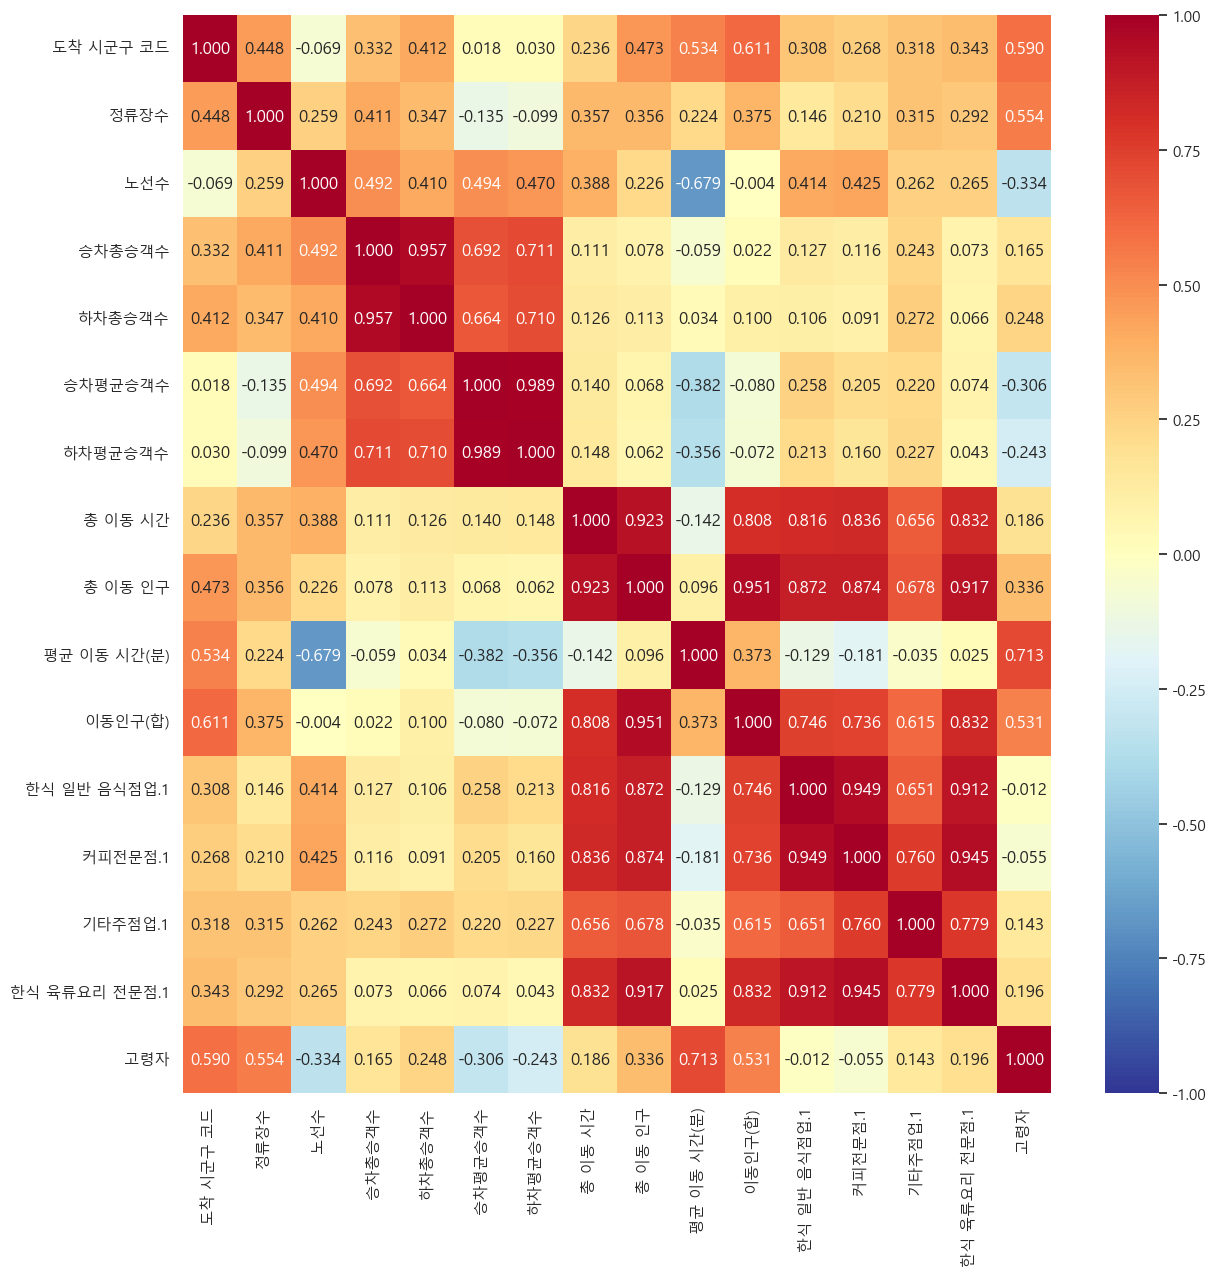

In [26]:
plt.figure(figsize = (14, 14))
sns.heatmap(df.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

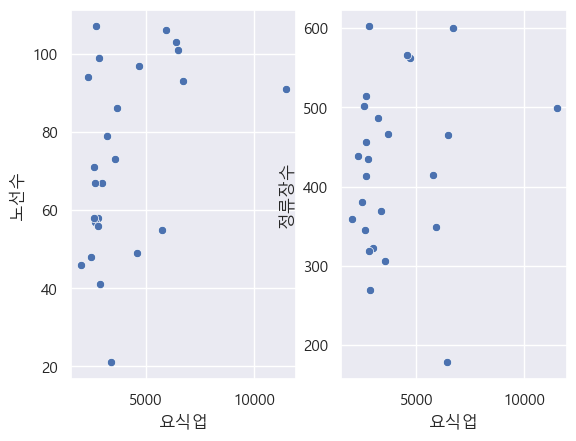

In [35]:
plt.subplot(1, 2, 1)
sns.scatterplot(x = "한식 일반 음식점업.1", y = "노선수", data = df)
plt.xlabel("요식업")
plt.subplot(1, 2, 2)
sns.scatterplot(x = "한식 일반 음식점업.1", y = "정류장수", data = df)
plt.xlabel("요식업")
plt.show()

In [37]:
import scipy.stats as spst
result1 = spst.pearsonr(df["한식 일반 음식점업.1"], df["노선수"])
result2 = spst.pearsonr(df["한식 일반 음식점업.1"], df["정류장수"])
print(f"노선수 : {result1}")
print(f"정류장수 : {result2}")

노선수 : PearsonRResult(statistic=0.41355583148989006, pvalue=0.03988391106862527)
정류장수 : PearsonRResult(statistic=0.1464452020423671, pvalue=0.4848526683019763)
